###Importing necessay libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from warnings import filterwarnings
filterwarnings('ignore')

Reading the Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CodSoft Projects/Titanic-Dataset.csv')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Pre-Processing

Checking for missing values

In [ ]:
dataset.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for duplicates

In [ ]:
dataset.duplicated().sum()

0

Dropping the Cabin column values since most of them are missing or null

In [ ]:
dataset.drop('Cabin',axis=1,inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
scount = dataset['Sex'].value_counts()
scount

,count
Sex,
male,577
female,314


Data Visualization

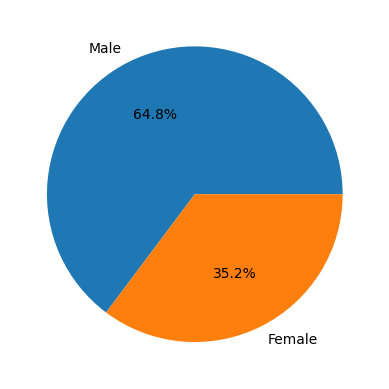

In [ ]:
plt.pie(scount,labels = ['Male','Female'],autopct='%1.1f%%')
plt.show()

In [ ]:
survived = dataset['Survived'].value_counts()
survived

,count
Survived,
0,549
1,342


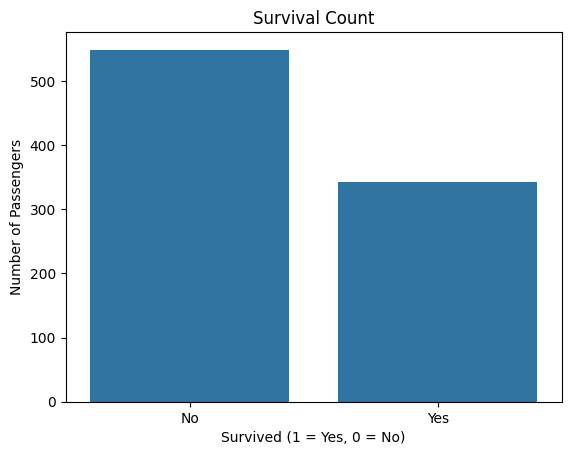

In [ ]:
sns.barplot(x=survived.index,y = survived.values)
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Filling the Missing Values

In [ ]:
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace = True)

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


Checking for outliers using Boxplot

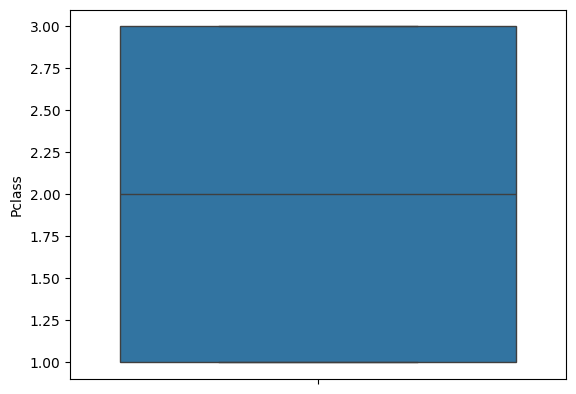

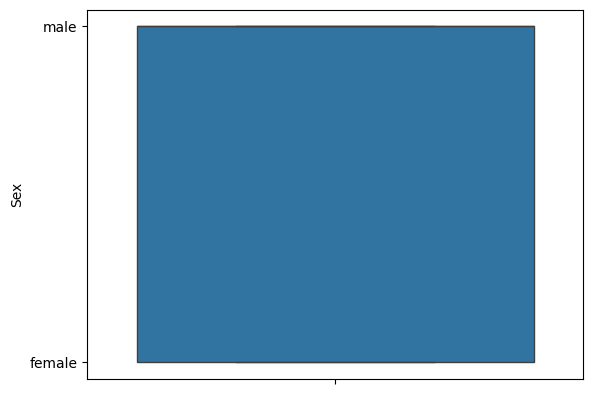

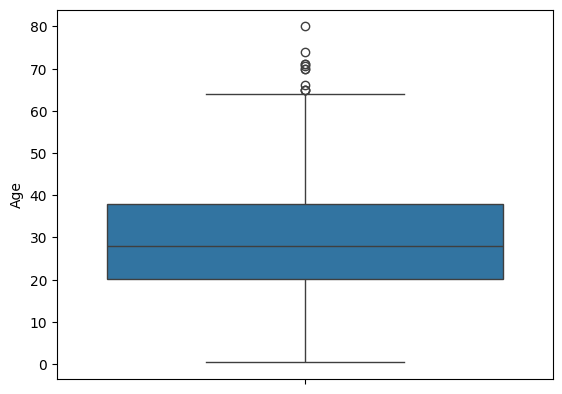

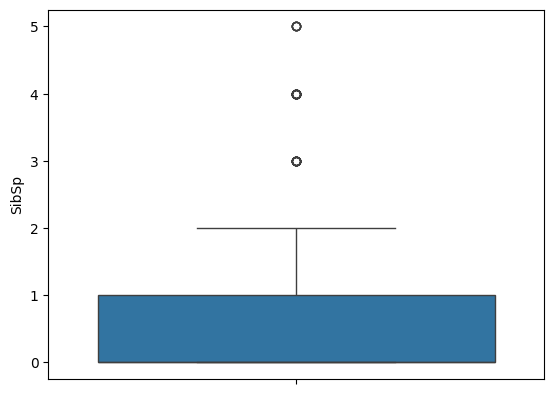

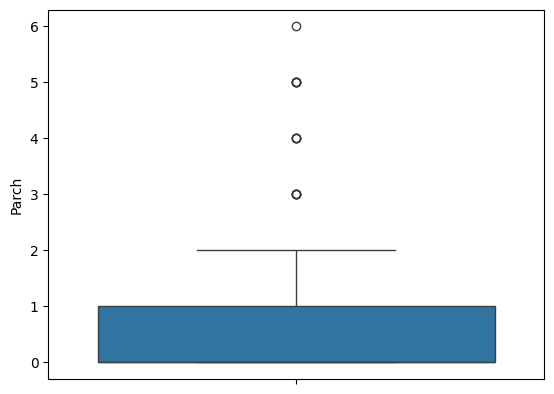

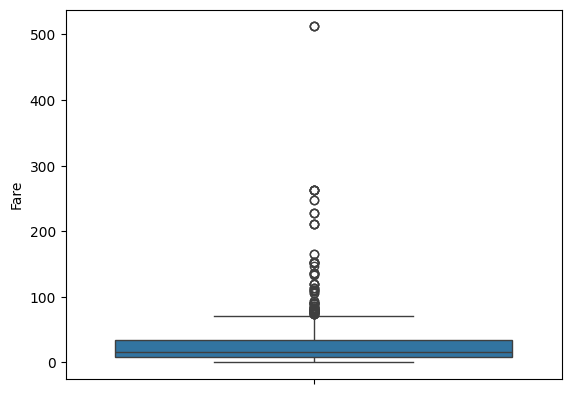

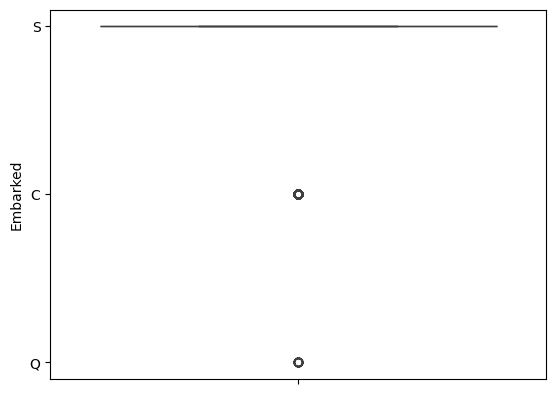

In [ ]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i in features:
  sns.boxplot(dataset[i])
  plt.show()

Removing outliers using Z-score method

In [ ]:
outlier = ['Age','Fare']
for i in outlier:
  z=np.abs(stats.zscore(dataset[i]))
  threshold = 2
  outliers_ = dataset[z > threshold]
  dataset.drop(outliers_.index,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  658 non-null    int64  
 1   Survived     658 non-null    int64  
 2   Pclass       658 non-null    int64  
 3   Name         658 non-null    object 
 4   Sex          658 non-null    object 
 5   Age          658 non-null    float64
 6   SibSp        658 non-null    int64  
 7   Parch        658 non-null    int64  
 8   Ticket       658 non-null    object 
 9   Fare         658 non-null    float64
 10  Embarked     658 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.7+ KB


#Model Building

In [ ]:
dataset.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)

In [ ]:
X = dataset.drop('Survived',axis = 1)
y = dataset['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


Converting object dtype to numerical using LabelEncoder

In [ ]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
y.value_counts()

,count
Survived,
0,397
1,261


Scaling the values using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Training the data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 18)

Building the models

In [ ]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

Fitting the data into the models

KNeighborsClassifier()
0.7777777777777778
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       107
           1       0.81      0.67      0.73        91

    accuracy                           0.78       198
   macro avg       0.78      0.77      0.77       198
weighted avg       0.78      0.78      0.77       198

RandomForestClassifier()
0.7676767676767676
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       107
           1       0.81      0.65      0.72        91

    accuracy                           0.77       198
   macro avg       0.78      0.76      0.76       198
weighted avg       0.77      0.77      0.76       198

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, fe

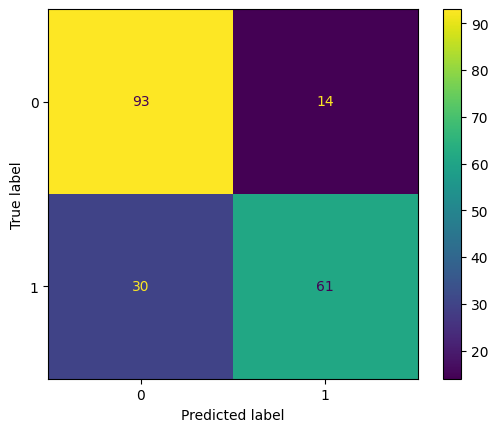

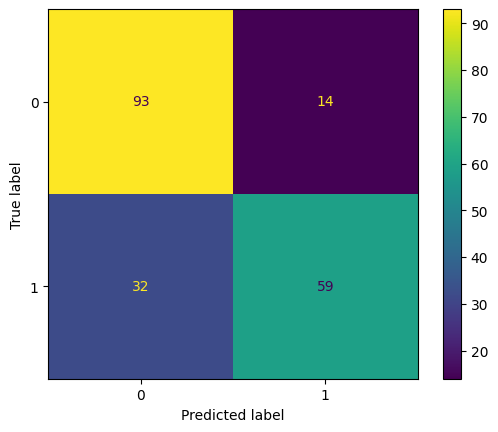

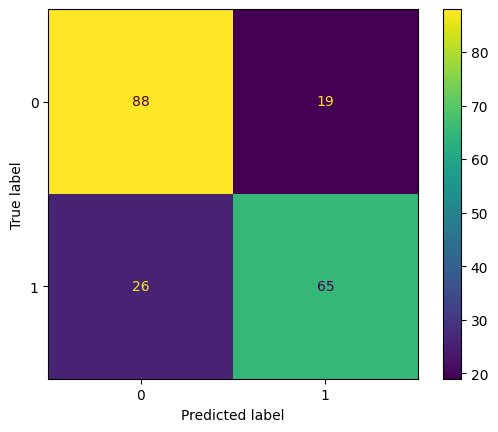

In [ ]:
models = [knn,rf,xgb]
r = []
for i in models:
  print(i)
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  r.append({"Model": i.__class__.__name__, "Accuracy":accuracy_score(y_test,y_pred)})
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Checking accuracy

In [ ]:
accuracy = pd.DataFrame(r)
accuracy

,Model,Accuracy
0,KNeighborsClassifier,0.777778
1,RandomForestClassifier,0.767677
2,XGBClassifier,0.772727


Hypertuning the best model

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
grid_search = GridSearchCV(estimator=knn, param_grid=parameters)
grid_search.fit(X_train, y_train)
knn_tuned = grid_search.best_estimator_

In [ ]:
y_pred2 = knn_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.7777777777777778


Predicting the custom values

In [ ]:
y_cust = knn.predict(scaler.transform([[3,1,22.0,1,0,7.2500,2]]))
result = y_cust.item()
if result == 0:
  print("Not Survived")
else:
  print("Survived")

Not Survived
